In [5]:
library(class)
library(MASS)
setwd('/home/matt/MSOR/ISYE7406/ML-Ex-Rates/Data')

In [6]:
ex_rate <- read.csv('oecd.csv')
#ex_rate <- subset(ex_rate, select = -c(X.x,X.y))

In [8]:
uk <- subset(ex_rate,ex_rate$Country.y=='uk')
head(uk)

,X,Date,Infl_d,BOT_d,Yield_d,FER_d,Int_d,PrimeRate_d,GDPG_d,CA_d,FDI_d,Country.x,Infl_f,BOT_f,Yield_f,FER_f,Int_f,PrimeRate_f,GDPG_f,CA_f,FDI_f,Country.y,Exchange,Exchange_fut,Pct_Chg,ScaledEx,ScaledEx_fut
10,10,1971-02-01,5.3,110,6.09,14699,NA,6.29,29.52117,2743.114,-837.3768,usa,NA,NA,NA,NA,NA,8,-3.259637,310.8612,399.3562,uk,0.6907031,NA,NA,1.156971,NA
20,20,1971-03-01,5,238,6.14,14534,NA,5.88,18.74402,1543.426,-178.3828,usa,NA,NA,NA,NA,NA,8,-1.981386,247.2186,306.7104,uk,0.6948305,NA,NA,1.2018,NA
28,28,1971-04-01,4.7,269,5.53,14342,NA,5.44,11.1,683,196,usa,NA,104,NA,NA,NA,8,-0.9,220,241,uk,0.6675122,NA,NA,0.9050855,NA
40,40,1971-05-01,4.2,-70,6.08,14307,NA,5.28,6.122433,107.2068,338.6235,usa,NA,NA,NA,NA,NA,7,-0.01177626,221.3166,198.0769,uk,0.6581545,NA,NA,0.8034485,NA
50,50,1971-06-01,4.4,-89,6.38,13811,NA,5.46,3.344655,-238.5834,302.3396,usa,NA,NA,NA,NA,NA,7,0.6869892,243.2796,173.793,uk,0.651763,NA,NA,0.7340278,NA
58,58,1971-07-01,4.6,-292,6.7,13504,NA,5.5,2.3,-409,140,usa,NA,183,NA,NA,NA,7,1.2,278,164,uk,0.6519755,NA,NA,0.7363355,NA


In [34]:
test_set <- subset(ex_rate,as.Date(ex_rate$Date)>"2014-01-01")
train_set <- subset(ex_rate,as.Date(ex_rate$Date)<="2014-01-01")
test_set <- na.omit(test_set[,c('ScaledEx_fut', "ScaledEx", "Infl_d","Int_d", "GDPG_d",
               "Infl_f", "Int_f", "GDPG_f","Country.y")])
train_set <- train_set[,c('ScaledEx_fut', "ScaledEx", "Infl_d","Int_d", "GDPG_d",
               "Infl_f", "Int_f", "GDPG_f","Country.y")]


Call:
lm(formula = ScaledEx_fut ~ ScaledEx + Infl_d + Int_d + GDPG_d + 
    Infl_f + Int_f + GDPG_f + Country.y + Country.y * GDPG_f, 
    data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7785  -0.1974   0.0004   0.1659   2.7044 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -0.434651   0.060341  -7.203 7.87e-13 ***
ScaledEx                     0.741527   0.018130  40.900  < 2e-16 ***
Infl_d                       0.046787   0.009337   5.011 5.82e-07 ***
Int_d                       -0.039631   0.006694  -5.920 3.68e-09 ***
GDPG_d                       0.022108   0.004845   4.563 5.29e-06 ***
Infl_f                       0.003264   0.007816   0.418 0.676215    
Int_f                        0.027406   0.006198   4.421 1.03e-05 ***
GDPG_f                       0.173172   0.068205   2.539 0.011181 *  
Country.ydenmark             0.236653   0.064430   3.673 0.000245 ***
Country.yeurope        

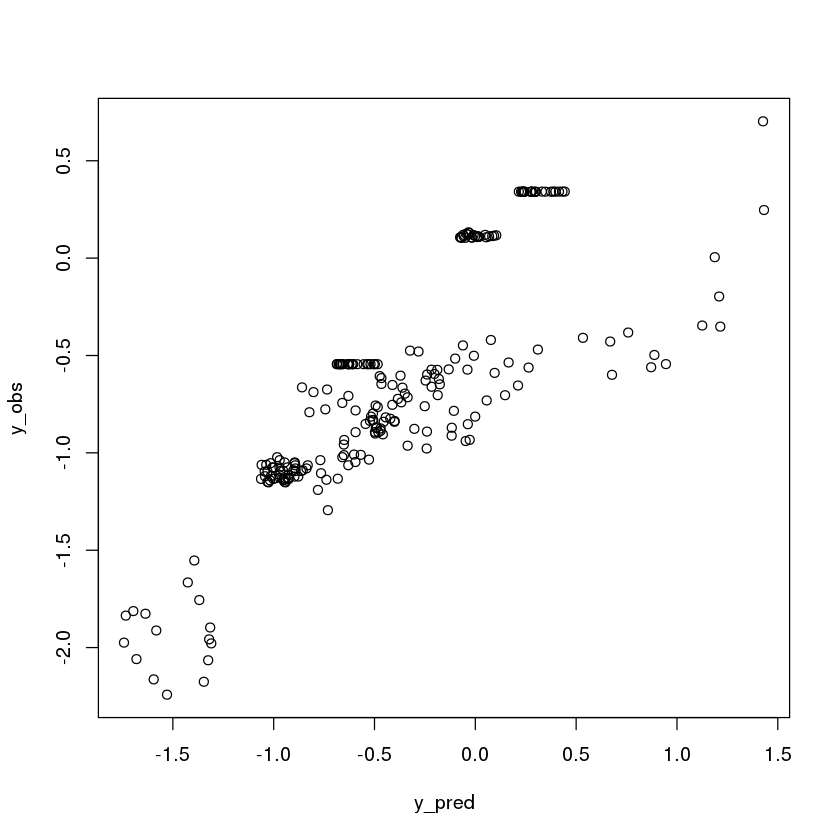

In [44]:
regmodel <- lm(ScaledEx_fut ~ ScaledEx + Infl_d  + Int_d  + GDPG_d  +
               Infl_f  + Int_f  + GDPG_f + Country.y  + Country.y*GDPG_f,data = train_set)
summary(regmodel)
y_pred <- predict.lm(regmodel, test_set[,-1]); y_obs <- test_set[,1]
compare <- cbind(y_pred,y_obs)
plot(compare)

In [42]:
ridge_reg <- lm.ridge(ScaledEx_fut ~ ScaledEx + Infl_d  + Int_d  + GDPG_d  +
               Infl_f  + Int_f  + GDPG_f ,data = train_set, lambda = seq(0,100,.01))
lambdaopt <- which.min(ridge_reg$GCV)
ridge_coef <- coef(ridge_reg)[lambdaopt,]
ridge_testmat <- as.matrix(cbind(1,test_set[,c(-1,-9)]))
ridge.test <- as.matrix(ridge_testmat %*% ridge_coef)
ridge.TE <- mean( (test_set[,-1]-ridge.test)^2)
lambdaopt

Warning message:
In Ops.factor(left, right): ‘-’ not meaningful for factors

5.98 
   599